In [1]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

### 1. 生成一批训练数据
y = ax + b (不加b，只有一个a的话，损失函数可以用个平面搞出来？)

设a=2, b=1, 可以产生一批数据
x=1.1, y=3.2
x=1.2, y=3.4
x=1.3, y=3.7
...

可以使用for循环生成这批数据，但使用numpy 或 pytorch的广播机制更方便、性能也更好

In [16]:
m = 10 #样本数量
x = torch.rand(m,1)
print(x,x.shape)

y = x*2 + 1 # y = ax + b
print(y,y.shape) #使用pytorch的广播机制更方便、性能也更好

tensor([[0.5690],
        [0.9634],
        [0.0962],
        [0.0071],
        [0.9956],
        [0.4627],
        [0.8271],
        [0.6023],
        [0.2810],
        [0.5355]]) torch.Size([10, 1])
tensor([[2.1379],
        [2.9268],
        [1.1924],
        [1.0143],
        [2.9912],
        [1.9255],
        [2.6541],
        [2.2047],
        [1.5620],
        [2.0711]]) torch.Size([10, 1])


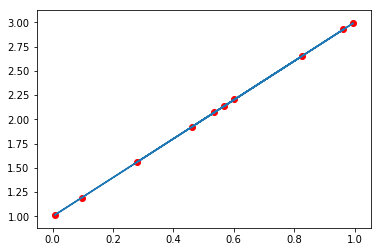

In [17]:
#图像表示？
plt.plot(x.view(-1,1).numpy(),y.view(-1,1).numpy())
# plt.plot(x.numpy(),y.numpy()) #ValueError: x and y must be the same size
plt.scatter(x,y,c = 'r',marker = 'o') 
plt.show()

### 2. 正向传播
假设一开始我们并不知道a和b的值是多少，只有很多很多的x,y值，如何从这些数据中确定a和b的值？

先假设一个a和b的值，例如设置a=0.1,b=0.2, 根据式子y=ax+b, 可以计算出, 预测的y值是多少，

通过比较这个预测的y值和真实的y值差多少，例如一点都不差，a,b的值就对了，如果还有差别，就需要继续调整a,b的值。

如何比较，预测值与真实值之间的差距呢，平方误差函数 sum( (y-pre_y)**2  )/m 

In [4]:
pre_y = x*0.1 + 0.2
print(pre_y,pre_y.size())

print ( y-pre_y )
print( (y-pre_y)**2 )
print( torch.sum((y-pre_y)**2) ) 

print( torch.sum((y-pre_y)**2)/m ) # sum( (ax+b - y) **2 )/m
print( torch.mean((y-pre_y)**2) )   # sum( (ax+b - y) **2 )/m

l = torch.nn.functional.mse_loss(y,pre_y) #等价上面2中表示方式
print(l)

tensor([[0.2749],
        [0.2999],
        [0.2590],
        [0.2146],
        [0.2927],
        [0.2060],
        [0.2692],
        [0.2859],
        [0.2129],
        [0.2825]]) torch.Size([10, 1])
tensor([[2.2223],
        [2.6974],
        [1.9212],
        [1.0771],
        [2.5619],
        [0.9138],
        [2.1154],
        [2.4319],
        [1.0454],
        [2.3670]])
tensor([[4.9388],
        [7.2761],
        [3.6909],
        [1.1601],
        [6.5636],
        [0.8350],
        [4.4748],
        [5.9140],
        [1.0929],
        [5.6025]])
tensor(41.5487)
tensor(4.1549)
tensor(4.1549)
tensor(4.1549)


In [5]:
# 可以手动调整a,b的值，观察当a,b接近真实值时，损失函数接近与0
l = torch.nn.functional.mse_loss(y,x*0.8 + 0.2)  
print(l)

l = torch.nn.functional.mse_loss(y,x*0.9 + 0.7)  
print(l)

l = torch.nn.functional.mse_loss(y,x*1.9 + 0.99)  
print(l)


tensor(2.4647)
tensor(1.0536)
tensor(0.0060)


### 3. 反向传播
如何根据真实值与预估值之间的差距来调整a,b值呢？

梯度下降，损失函数的直观图示？

对损失函数求导:

(ax+b - y) * * 2  （复合函数求导 L= (f(x) -y) ** 2 ）
a的偏导: 2(ax + b - y)*x
b的偏导: 2(ax+b - y)

a:= a - lrate*d(a)
b:= b - lrage*d(b)

pytorch的反向传播机制？


In [6]:
pre_y = x*1.2 + 0.99
da=torch.mean( ( pre_y - y)*x)
print(da)
db = torch.mean( (pre_y - y))
print(db)

tensor(-0.3823)
tensor(-0.4880)


In [7]:
#迭代，求a和b的值

a=0.01
b=0.01
learning_rate = 0.01

for i in range(10000):
    pre_y = x*a + b
    tmp_a = a - learning_rate*torch.mean( (pre_y - y)*x)
    tmp_b = b - learning_rate*torch.mean( (pre_y - y))
    a = tmp_a
    b = tmp_b
    if i%500 == 0:
        cost = torch.nn.functional.mse_loss(y,pre_y) 
        print(a,b,cost)
    

tensor(0.0253) tensor(0.0318) tensor(5.1976)
tensor(1.3711) tensor(1.4072) tensor(0.0459)
tensor(1.5826) tensor(1.2716) tensor(0.0203)
tensor(1.7225) tensor(1.1806) tensor(0.0090)
tensor(1.8155) tensor(1.1200) tensor(0.0040)
tensor(1.8774) tensor(1.0798) tensor(0.0017)
tensor(1.9185) tensor(1.0530) tensor(0.0008)
tensor(1.9458) tensor(1.0353) tensor(0.0003)
tensor(1.9640) tensor(1.0234) tensor(0.0002)
tensor(1.9761) tensor(1.0156) tensor(0.0001)
tensor(1.9841) tensor(1.0104) tensor(0.0000)
tensor(1.9894) tensor(1.0069) tensor(0.0000)
tensor(1.9930) tensor(1.0046) tensor(5.7562e-06)
tensor(1.9953) tensor(1.0030) tensor(2.5449e-06)
tensor(1.9969) tensor(1.0020) tensor(1.1259e-06)
tensor(1.9979) tensor(1.0013) tensor(4.9894e-07)
tensor(1.9986) tensor(1.0009) tensor(2.2194e-07)
tensor(1.9991) tensor(1.0006) tensor(9.9335e-08)
tensor(1.9994) tensor(1.0004) tensor(4.4876e-08)
tensor(1.9996) tensor(1.0003) tensor(2.0412e-08)


### 4. 多特征的情况，特征和权重都用向量操作
y = w1*x1 + w2*x2 + w3*x3 + ... + b

y = X.WT + b

y = X.Wt (x尾部增加一列1，把b放入W) #pytorch是这样的么？

In [8]:
m = 10 #样本数量
n = 5 # 特征数量
b = 10 
x = torch.rand(m,n)
#print(x)
w = torch.rand(1,n)
#print(w)
y = x.matmul(torch.t(w)) + b
print(y)

y = torch.mm(x,torch.t(w)) + b #torch.mm 等价 x.matmul
print(y) 

tensor([[11.2189],
        [12.0847],
        [11.8360],
        [11.8297],
        [11.3446],
        [11.2870],
        [11.6242],
        [12.0731],
        [11.7695],
        [11.9022]])
tensor([[11.2189],
        [12.0847],
        [11.8360],
        [11.8297],
        [11.3446],
        [11.2870],
        [11.6242],
        [12.0731],
        [11.7695],
        [11.9022]])


In [9]:
one = torch.ones(m,1)
# print(one)
x1 = torch.cat([x,one],-1)
print(x1) 
b1 = torch.tensor([[b]],dtype=torch.float)
print(b1)
w1 = torch.cat([w,b1],-1)
print(w1)
y1 = torch.mm(x1,torch.t(w1))
print(y1)

tensor([[0.8168, 0.3197, 0.2967, 0.0579, 0.2479, 1.0000],
        [0.9049, 0.4754, 0.5885, 0.5183, 0.9407, 1.0000],
        [0.7813, 0.1585, 0.4884, 0.7606, 0.4192, 1.0000],
        [0.4551, 0.5130, 0.5467, 0.7839, 0.5705, 1.0000],
        [0.4457, 0.0918, 0.2462, 0.8089, 0.2406, 1.0000],
        [0.1712, 0.3619, 0.8802, 0.2749, 0.7154, 1.0000],
        [0.6962, 0.1161, 0.9439, 0.1760, 0.9793, 1.0000],
        [0.9989, 0.1604, 0.6464, 0.7280, 0.2005, 1.0000],
        [0.9422, 0.2610, 0.7257, 0.2013, 0.6927, 1.0000],
        [0.4168, 0.6678, 0.7353, 0.6170, 0.7851, 1.0000]])
tensor([[10.]])
tensor([[ 0.9170,  0.5936,  0.6385,  0.8452,  0.1689, 10.0000]])
tensor([[11.2189],
        [12.0847],
        [11.8360],
        [11.8297],
        [11.3446],
        [11.2870],
        [11.6242],
        [12.0731],
        [11.7695],
        [11.9022]])


In [10]:
# 测试下torch.mean的用法
test_mean = torch.tensor([[1,2,3],[4,5,6]],dtype=torch.float)
m0 = torch.mean(test_mean,0)
m1 = torch.mean(test_mean,1)#
print(m0,m1)
print(m1.view(-1,1))
m2 = torch.mean(test_mean,1,keepdim=True)
print(m2)

tensor([2.5000, 3.5000, 4.5000]) tensor([2., 5.])
tensor([[2.],
        [5.]])
tensor([[2.],
        [5.]])


In [11]:
print('w1:',w1)

w_x = torch.rand_like(w1)
print('w_x:',w_x)

learning_rate = 0.01
for i in range(35000):
    pre_y = torch.mm(x1,torch.t(w_x))
#     print(pre_y)
    
    ld = (pre_y - y1)*x1
#     print(ld)
#     print("dim0:",torch.mean(ld,0))
#     print("dim1:",torch.mean(ld,1))
    w_x = w_x - learning_rate*torch.mean( ld ,0)  
#     w_x = tmp_w  #
    
    if i%2000 == 0:
        cost = torch.nn.functional.mse_loss(y1,pre_y) 
        print(w_x,cost)

w1: tensor([[ 0.9170,  0.5936,  0.6385,  0.8452,  0.1689, 10.0000]])
w_x: tensor([[0.3550, 0.2091, 0.7915, 0.3652, 0.7814, 0.7845]])
tensor([[0.4183, 0.2387, 0.8490, 0.4125, 0.8358, 0.8795]]) tensor(90.2731)
tensor([[2.6514, 1.1768, 2.0964, 2.4906, 1.0632, 6.3819]]) tensor(0.4001)
tensor([[2.1531, 1.1432, 1.8145, 2.0063, 0.4938, 7.4868]]) tensor(0.1850)
tensor([[1.7862, 1.0985, 1.6190, 1.6283, 0.2151, 8.2252]]) tensor(0.0897)
tensor([[1.5334, 1.0422, 1.4544, 1.3731, 0.0681, 8.7310]]) tensor(0.0454)
tensor([[ 1.3592,  0.9829,  1.3145,  1.2031, -0.0030,  9.0816]]) tensor(0.0241)
tensor([[ 1.2381,  0.9260,  1.1965,  1.0898, -0.0295,  9.3272]]) tensor(0.0135)
tensor([[ 1.1530,  0.8741,  1.0977,  1.0138, -0.0306,  9.5011]]) tensor(0.0078)
tensor([[ 1.0925,  0.8282,  1.0155,  0.9626, -0.0182,  9.6257]]) tensor(0.0047)
tensor([[1.0491, 0.7887, 0.9474, 0.9278, 0.0005, 9.7160]]) tensor(0.0029)
tensor([[1.0175, 0.7550, 0.8913, 0.9041, 0.0214, 9.7823]]) tensor(0.0019)
tensor([[0.9942, 0.7266, 0.8